# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries

%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd


## Challenge 1

#### The data we will use in this challenge is:

In [37]:
x = np.arange(0,100) # Return evenly spaced values within a given interval.
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

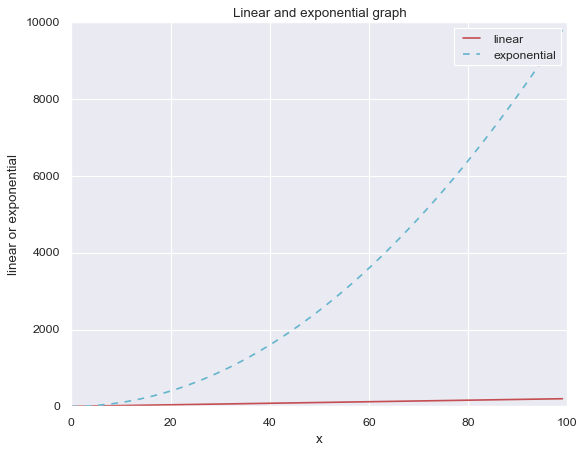

In [38]:
plt.plot(x,y,label="linear", c="r", linestyle="-")
plt.plot(x,z,label="exponential", c="c", linestyle="--")

plt.xlabel("x")
plt.ylabel("linear or exponential")

plt.title("Linear and exponential graph")

plt.legend()
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

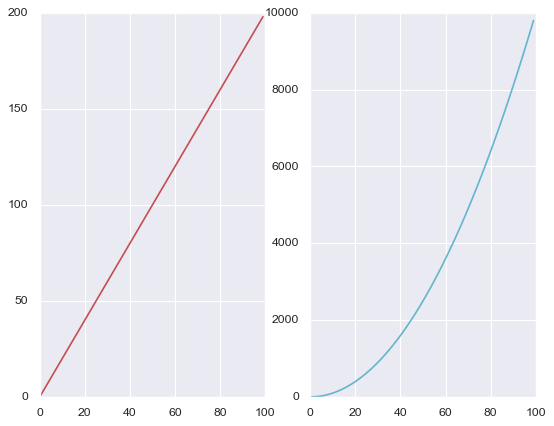

In [39]:
# define fig, (graph1, graph2) = plt.subplots(nrows, ncols)
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)

# graph1.plot(x,y)
ax1.plot(x,y,c="r")

# graph1.plot(x,y)
ax2.plot(x,z, c="c")

plt.show()

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

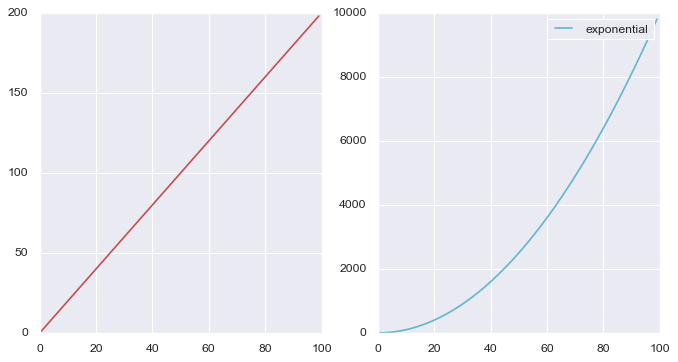

In [40]:
fig, (linear,exponential) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

linear.plot(x,y, label="linear", c="r") # Don't know why label doesn't show in the graph
exponential.plot(x,z, label="exponential", c="c")

plt.legend()
plt.show()

#### Now you will have to plot both $y=x^2$ and $y=e^x$ in the same plot. Create two subplots and use a normal scale in the first one and a logarithmic scale in the second one.
**Hint**: Use `set_xscale` and `set_yscale`.

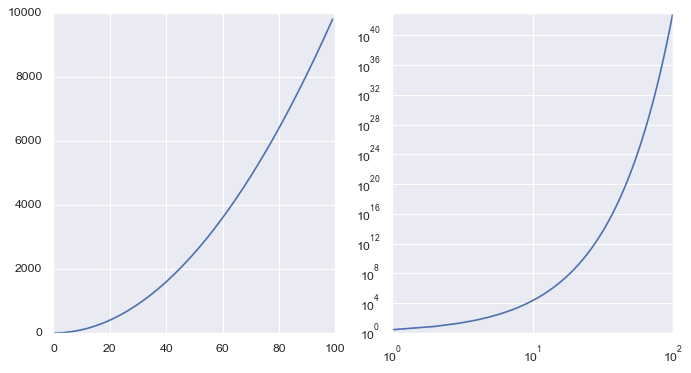

In [41]:
import math

x = np.arange(0,100) # Return evenly spaced values within a given interval.
y = x**2
z = np.exp(x)

fig, [exponential,euler] = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
exponential.plot(x,y)
euler.plot(x,z)

exponential.set_xscale('linear')
exponential.set_yscale('linear')

euler.set_xscale('log')
euler.set_yscale('log')

plt.show()

#### As a bonus challenge, try to add a legend to the plot.

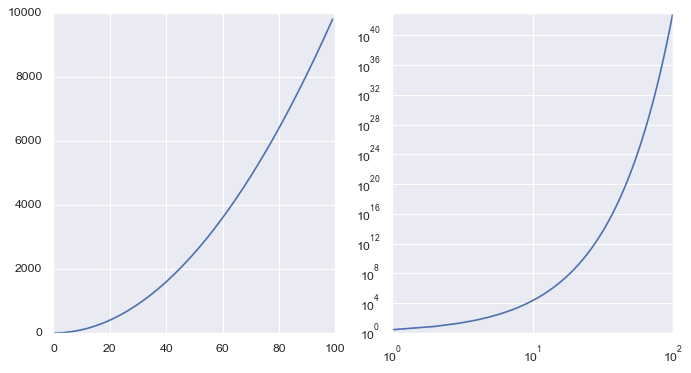

No handles with labels found to put in legend.


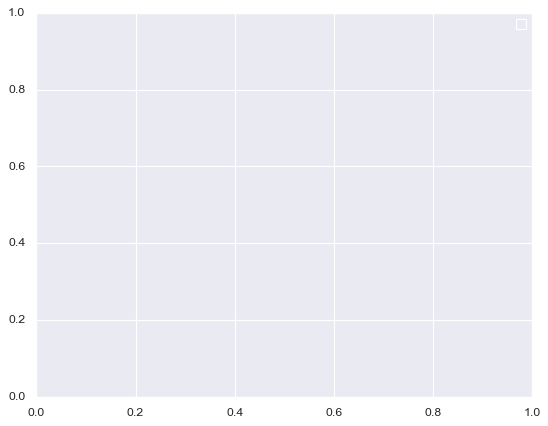

In [42]:
"""check!!!!!!"""

fig, [exponential,euler] = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
exponential.plot(x,y, label="exponential")
euler.plot(x,z, label="euler")

exponential.set_xscale('linear')
exponential.set_yscale('linear')

euler.set_xscale('log')
euler.set_yscale('log')

plt.show()

exponential.set_label("exponential")
euler.set_label("euler")

plt.legend()
plt.show()



## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [43]:
fitbit = pd.read_csv("../Fitbit2.csv")
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

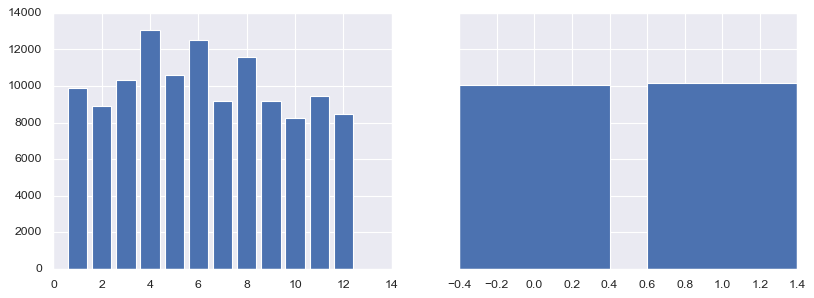

In [44]:
# MEDIAN STEPS BY MONTH_ENCODED
fitbit_monthly = fitbit.groupby("Months_encoded").Steps.mean().reset_index()
x_month = list(fitbit_monthly["Months_encoded"].values)
y_month = list(fitbit_monthly["Steps"].values)

# MEDIAN STEPS BY WORK_OR_WEEKEND
fitbit_day = fitbit.groupby("Work_or_Weekend").Steps.mean().reset_index()
x_day = list(fitbit_day["Work_or_Weekend"].values)
y_day = list(fitbit_day["Steps"].values)

# plot
fig, (month, day) = plt.subplots(nrows=1, ncols=2, figsize=(12,4), sharey=True)

month.bar(x_month, y_month)
day.bar(x_day, y_day)

plt.show()
fig.savefig("../fitbit1.png")


#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

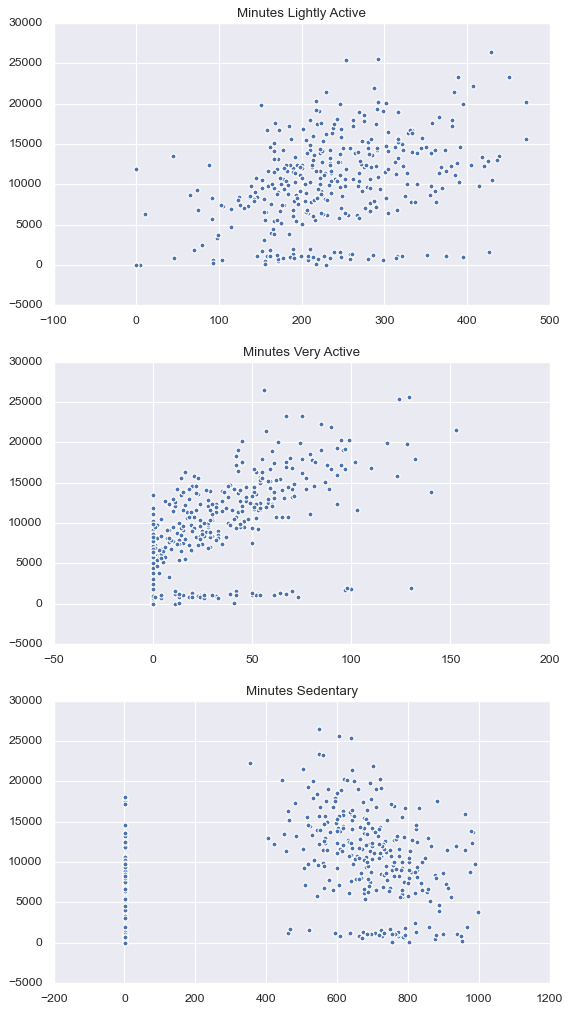

In [45]:
variable = ['Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary']

f, ax = plt.subplots(3,1, figsize= (8,15))
y = fitbit['Steps'].values

index = 0
for v in variable:
    x = fitbit[v].values
    plt.sca(ax[index])
    plt.scatter(x,y)
    plt.title(v)
    index += 1

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [46]:
titanic = pd.read_csv("../titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [47]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [13]:
# NUMERICAL VARIABLES
titanic.select_dtypes(['int',"float"])

# or alternatively:
titanic.select_dtypes(exclude = "object")


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [14]:
# CATEGORICAL VARIABLES
titanic.select_dtypes("object")

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [15]:
plt.style.use('classic')
plt.figure(figsize=(12,6))

<Figure size 960x480 with 0 Axes>

<Figure size 960x480 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

In [16]:
titanic["Age"]

0       22.000000
1       38.000000
2       26.000000
3       35.000000
4       35.000000
          ...    
1304    29.513190
1305    39.000000
1306    38.500000
1307    29.513190
1308    25.315435
Name: Age, Length: 1309, dtype: float64

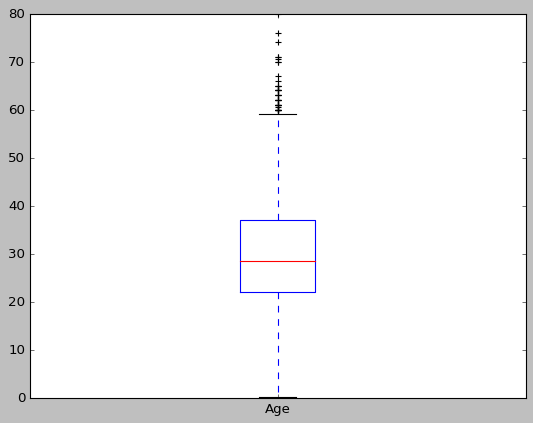

In [17]:
titanic["Age"].plot.box()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

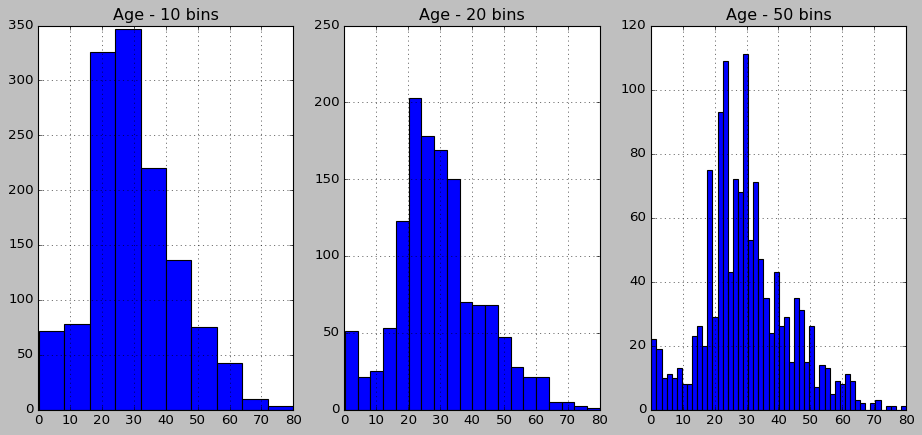

In [18]:
f, ax = plt.subplots(1, 3, figsize=(14,6))

bins = [10, 20, 50]

for i in range(3):
    plt.sca(ax[i])
    titanic["Age"].hist(bins=bins[i])
    plt.title(f'Age - {bins[i]} bins')


#### How does the bin size affect your plot?

In [19]:
"""
The more bins, the more precise the distrubution is. Contrarily, less bins make a smoother graph
"""

'\nThe more bins, the more precise the distrubution is. Contrarily, less bins make a smoother graph\n'

#### Use seaborn to show the distribution of column `Age`.

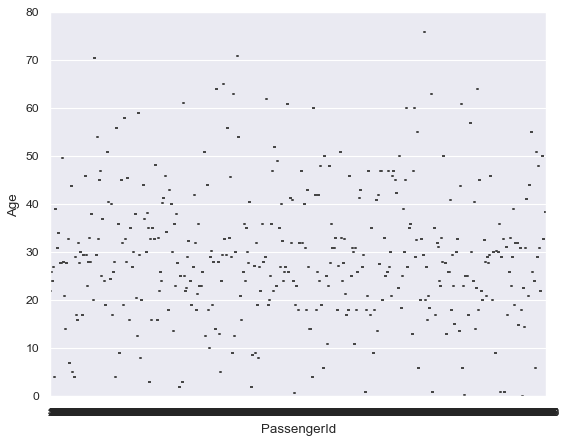

In [20]:
import seaborn as sns
sns.set()

sns.boxplot(x="PassengerId", y="Age", data=titanic)
sns.boxplot(x="PassengerId", y="Age", data=titanic)



#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

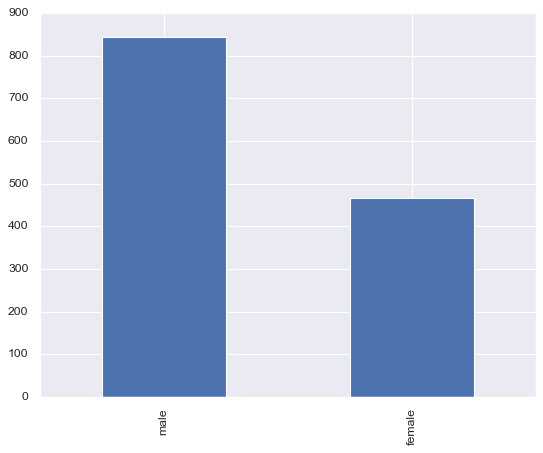

In [51]:
# Method 1 - matplotlib
gender = titanic["Gender"].value_counts()
gender.plot.bar()
plt.show()

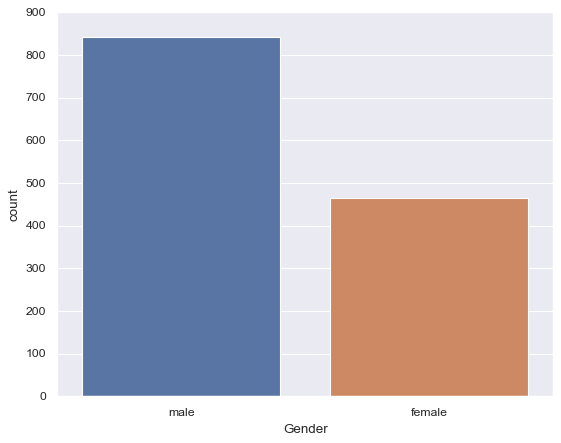

In [54]:
# Method 2 - seaborn
sns.countplot(titanic["Gender"])
plt.show()

#### Use the right plot to visualize the column `Pclass`.

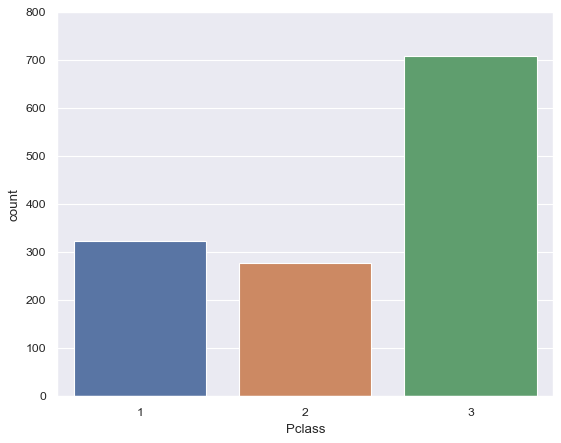

In [55]:
sns.countplot(titanic["Pclass"])
plt.show()

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

Text(0.5, 1.0, 'Ages boxplot')

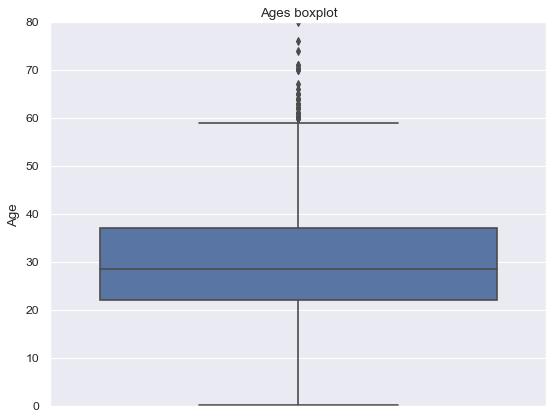

In [66]:
fig = sns.boxplot(x = 'Age', data = titanic, orient = 'v')
fig.set_title('Ages boxplot')

In [67]:
"""
A boxplot gives information on median, quartiles, min/max and outliers
"""

'\nA boxplot gives information on median, quartiles, min/max and outliers\n'

#### What does the last plot tell you about the feature `Age`?

In [26]:
"""
your comments here
"""

'\nyour comments here\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

Text(0.5, 1.0, 'Ages Distribution')

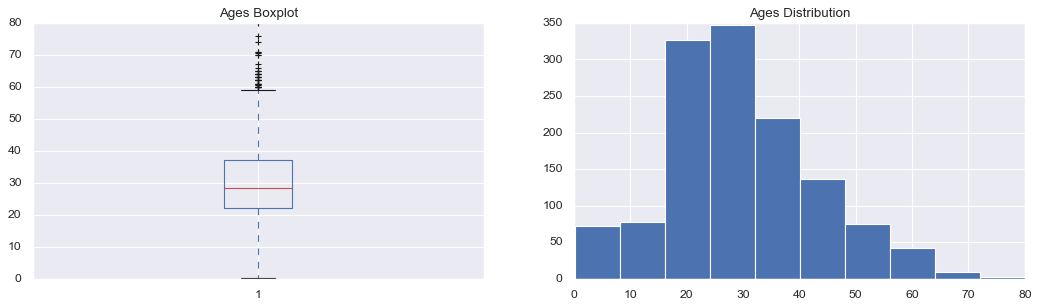

In [75]:
f, (ax1,ax2) = plt.subplots(1,2, figsize=(16,4))
plt.sca(ax1)
plt.boxplot(titanic['Age'])
plt.title('Ages Boxplot')

plt.sca(ax2)
plt.hist(titanic.Age)
plt.title('Ages Distribution')

#### What additional information does the last plot provide about feature `Age`?

In [28]:
"""
your comments here
"""

'\nyour comments here\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

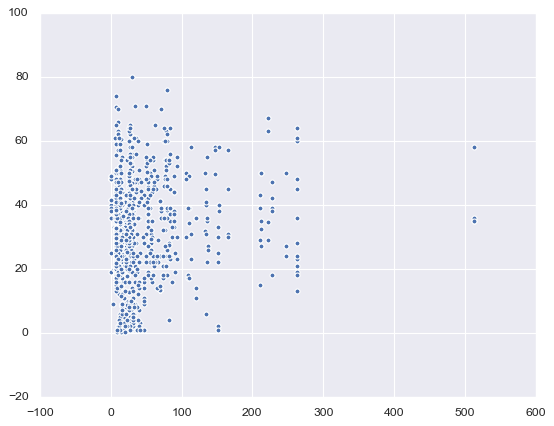

In [58]:
# Method 1 - matplotlib
plt.scatter(titanic["Fare"], titanic["Age"])

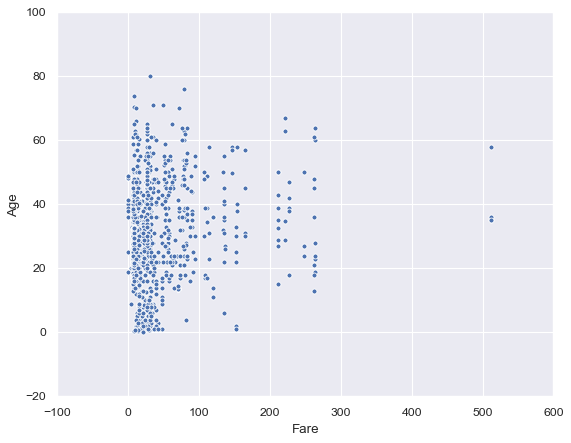

In [60]:
# Method 2 - seaborn
sns.scatterplot(titanic["Fare"], titanic["Age"])

#### Plot the correlation matrix using seaborn.

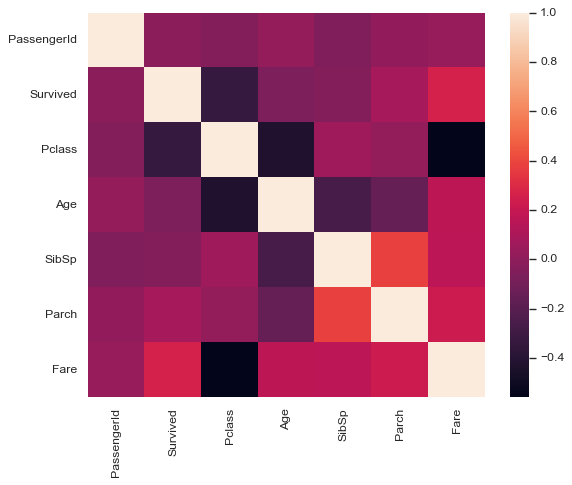

In [61]:
corr = titanic.corr()
sns.heatmap(corr)

#### What are the most correlated features?

In [62]:
"""
SibSp & Parch
"""

'\nSibSp & Parch\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

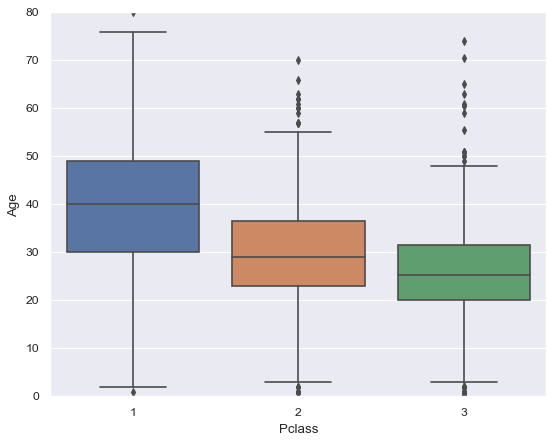

In [63]:
sns.boxplot(x=titanic["Pclass"], y=titanic["Age"])

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

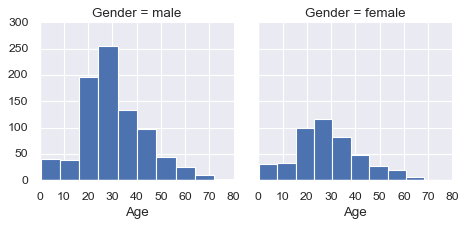

In [65]:
g = sns.FacetGrid(titanic,col="Gender")
g.map(plt.hist, "Age")